# Plotting Directly With Matplotlib

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_canada = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv")
df_canada.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


How many entries are in our dataset?

In [3]:
print(df_canada.shape[0])

195


Setting <code>Country</code> as index for easy traversing:

In [4]:
df_canada.set_index('Country', inplace=True)
df_canada.index.name = None
df_canada.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


Creating list of years for easy plotting:

In [5]:
years = list(map(str, range(1980, 2014)))

## Line Plot

#### Let's visualize the trend of total immigration into Canada from 1980 - 2013

In [6]:
df_years = df_canada[years]
total_im = df_years.sum()
total_im.head()

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
dtype: int64

Plotting:

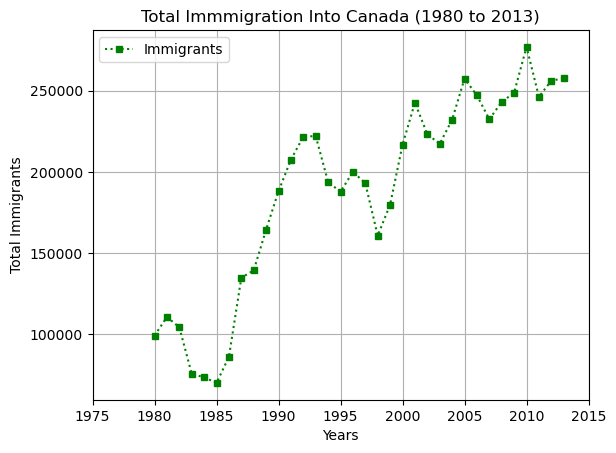

In [7]:
# create figure and axes
fig, ax = plt.subplots()
# changing index type to int x
total_im.index = total_im.index.map(int)

# plotting line
ax.plot(total_im,
       marker='s', # square shaped markers
       markersize=5, 
       color='green',
       linestyle='dotted')

# setting title and labels
ax.set_title('Total Immmigration Into Canada (1980 to 2013)')
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

# lim on x-axis
ax.set_xlim(1975, 2015)

# grid
ax.grid(True)

# legend
ax.legend(['Immigrants'])

plt.show()

#### Effects of 2010 Haiti earthquake on immigration to Canada:

In [8]:
# retrieving data
df_haiti = df_canada.loc[['Haiti'], years].transpose()
# converting index to type int for better plotting
df_haiti.index = df_haiti.index.map(int)
df_haiti.head()

,Haiti
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


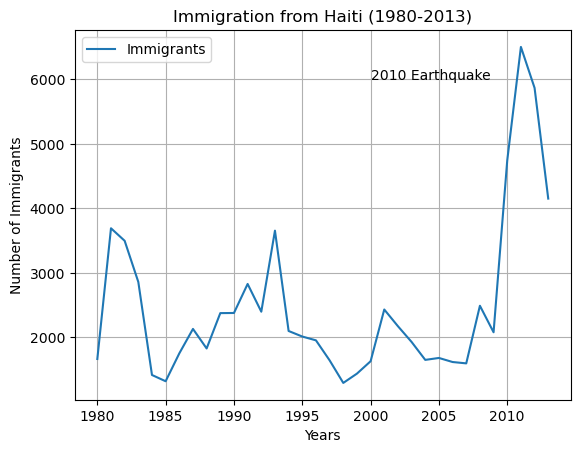

In [9]:
fig, ax = plt.subplots()

ax.plot(df_haiti)

# title and labels
ax.set_title('Immigration from Haiti (1980-2013)')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

# visual aids
ax.legend(['Immigrants'])
ax.grid(True)
ax.annotate('2010 Earthquake', xy=(2000, 6000))

# specify ticks (start, end, step)
ax.set_xticks(list(range(1980, 2015, 5)))

plt.show()

## Scatter Plot

#### Total immigration into Canada (1980-2013):

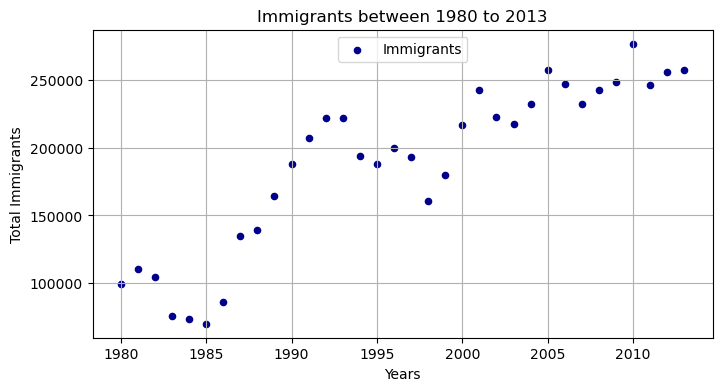

In [11]:
# we already have total immigration data saved
total_im.index = total_im.index.map(int)
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(total_im.index, total_im,
          marker='o',
          s=20,
          color='darkblue')

#add title 
plt.title('Immigrants between 1980 to 2013') 
#add labels 
plt.xlabel('Years')
plt.ylabel('Total Immigrants') 
#including grid
plt.grid(True)

#Legend at upper center of the figure
ax.legend(["Immigrants"], loc='upper center')

#Display the plot
plt.show()



## Bar Plot
#### Top 5 countries contributing to immigration into Canada (1980-2013)

In [23]:
# sorting values by total immigration over specified span
df_canada.sort_values(by='Total', ascending=False, inplace=True)
# selecting top 5
df_top5 = df_canada.head()
# pushing country back into columns and setting index to int
df_top5.reset_index(inplace=True)
# renaming Country columns
df_top5_bar = df_top5.rename(columns={'index':'Country'})
# creating label list of country names for plotting
labels = list(df_top5_bar.Country)
labels

['India',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan']

In [24]:
# 3rd name is too lengthy
labels[2]='UK'

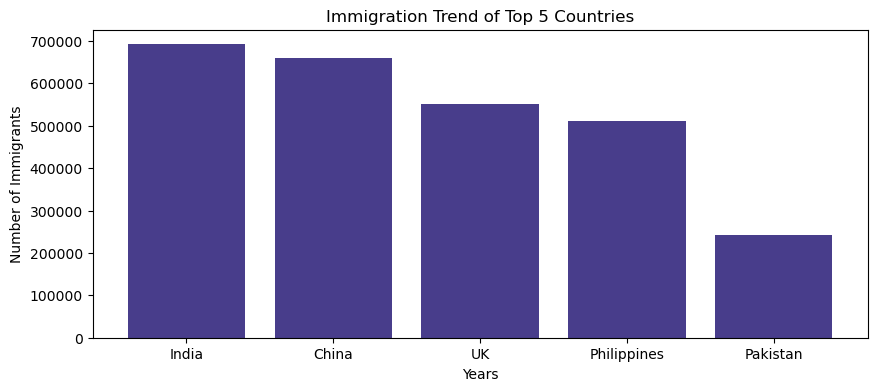

In [30]:
fig, ax = plt.subplots(figsize=(10,4))

ax.bar(labels, df_top5_bar['Total'], label=labels, color='darkslateblue')

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

#### Bottom 5 Countries least contributing to immigration (1980-2013):

In [35]:
# Sorting the dataframe 
df_canada.sort_values(by='Total', ascending=True, inplace=True)
# getting bottom 5 
df_least5 = df_canada.head()
df_least5.index.name = 'Country'
df_least5.reset_index(inplace=True)
labels = list(df_least5.Country)
labels

['Palau', 'Western Sahara', 'Marshall Islands', 'New Caledonia', 'San Marino']

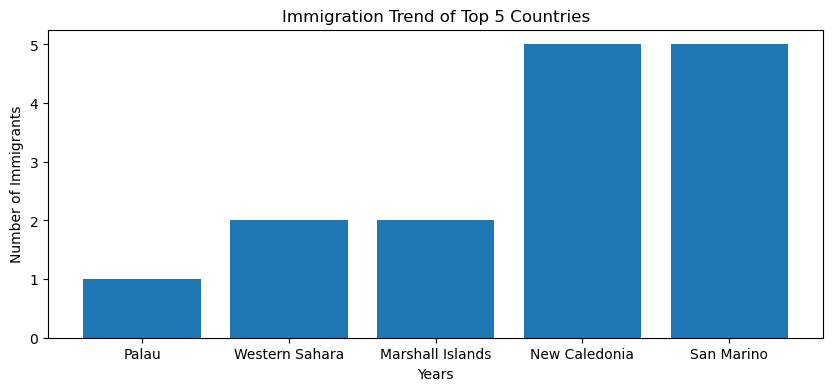

In [36]:
fig, ax = plt.subplots(figsize=(10,4))


ax.bar(labels, df_least5['Total'],label=labels)
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()


## Histogram
#### What is the frequency distribution of the population of new immigrants from the various countries into Canada in 2013?

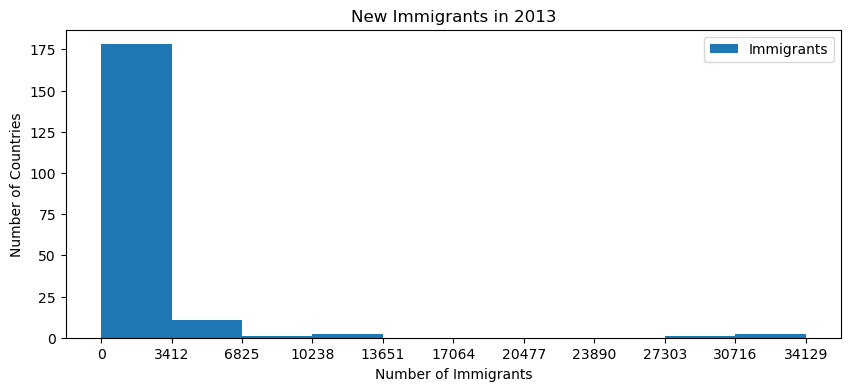

In [44]:
df_country = df_canada.groupby(['Country'])['2013'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10,4))

# hist function returns list of arrays [counts and bins]
count = ax.hist(df_country['2013'])


ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.set_xticks(list(map(int, count[1])))
ax.legend(['Immigrants'])

#Display the plot
plt.show()

In [ ]:
df